In [7]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
path_file = 'GDCdata/data_30_cancer.csv'

In [3]:
data = pd.read_csv(path_file)

In [4]:
data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,20521,20522,20523,20524,20525,20526,20527,20528,20529,_primary_disease
0,TCGA-S9-A7J2-01,10.9576,4.8099,0.4657,11.2675,10.1761,10.4769,13.0456,3.2299,0.4657,...,1.3357,2.9741,0.0000,9.2594,9.4779,6.1595,9.6465,0.0000,9.4848,brain lower grade glioma
1,TCGA-G3-A3CH-11,11.0186,5.3847,0.0000,11.6690,11.3980,10.8249,11.5487,3.5408,1.4714,...,3.5408,5.5302,0.0000,7.5066,10.5302,7.3741,13.0045,7.0466,10.3411,liver hepatocellular carcinoma
2,TCGA-EK-A2RE-01,9.7106,2.8888,0.4192,11.4903,11.7371,9.9473,10.8410,2.5988,0.0000,...,0.0000,2.9530,1.2319,9.5217,13.8492,6.5812,9.2958,0.4192,9.7450,cervical & endocervical cancer
3,TCGA-44-6778-01,9.6205,7.9642,1.5378,11.8432,11.0531,10.9005,12.4145,4.5366,2.0609,...,2.0609,6.1839,4.1291,8.9832,12.3412,9.0862,10.4779,9.4517,10.4395,lung adenocarcinoma
4,TCGA-VM-A8C8-01,11.6596,8.5622,0.0000,11.2677,11.3549,10.8579,13.2560,5.9962,0.0000,...,0.0000,4.7530,0.6034,9.0573,8.8984,5.9116,9.9584,1.6216,9.6811,brain lower grade glioma


In [35]:
X = data.drop(['Unnamed: 0', '_primary_disease'], axis=1)
y = data['_primary_disease']

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'breast invasive carcinoma'),
  Text(1, 0, 'kidney clear cell carcinoma'),
  Text(2, 0, 'lung adenocarcinoma'),
  Text(3, 0, 'thyroid carcinoma'),
  Text(4, 0, 'head & neck squamous cell carcinoma'),
  Text(5, 0, 'lung squamous cell carcinoma'),
  Text(6, 0, 'prostate adenocarcinoma'),
  Text(7, 0, 'brain lower grade glioma'),
  Text(8, 0, 'skin cutaneous melanoma'),
  Text(9, 0, 'stomach adenocarcinoma'),
  Text(10, 0, 'bladder urothelial carcinoma'),
  Text(11, 0, 'liver hepatocellular carcinoma'),
  Text(12, 0, 'colon adenocarcinoma'),
  Text(13, 0, 'kidney papillary cell carcinoma'),
  Text(14, 0, 'cervical & endocervical cancer'),
  Text(15, 0, 'ovarian serous cystadenocarcinoma'),
  Text(16, 0, 'sarcoma'),
  Text(17, 0, 'uterine corpus endometrioid carcinoma'),
  Text(18, 0, 'esoph

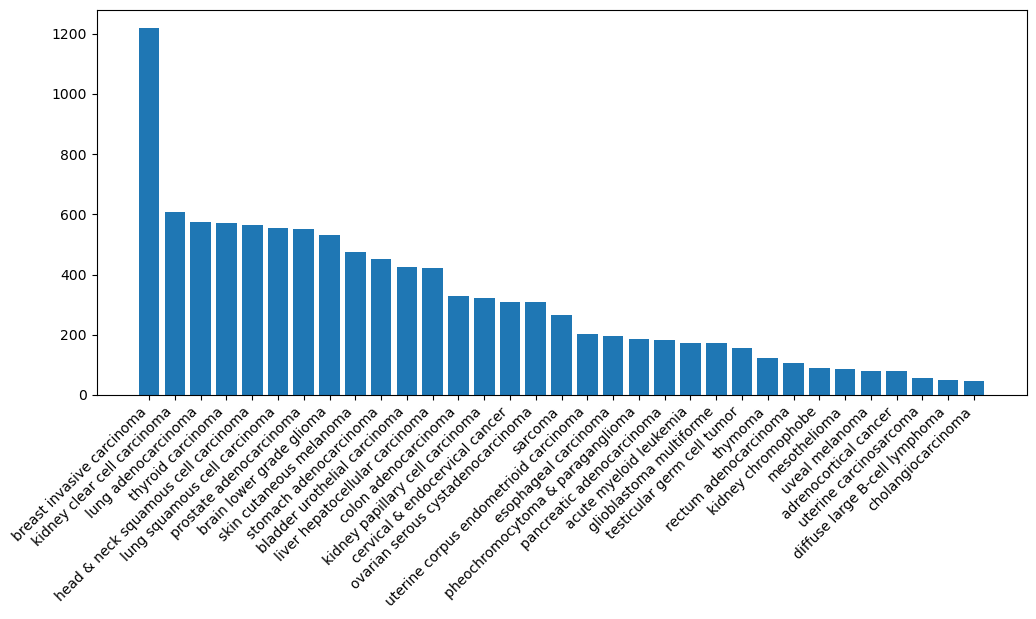

In [23]:
plt.figure(figsize=(12, 5))
values_count = data['_primary_disease'].value_counts()
plt.bar(values_count.index, values_count.values)
plt.xticks(rotation=45, ha='right') 

## Sử dụng PCA

In [36]:
lb = LabelEncoder()
lb.fit(y)
y_encoder = lb.transform(y)

In [27]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

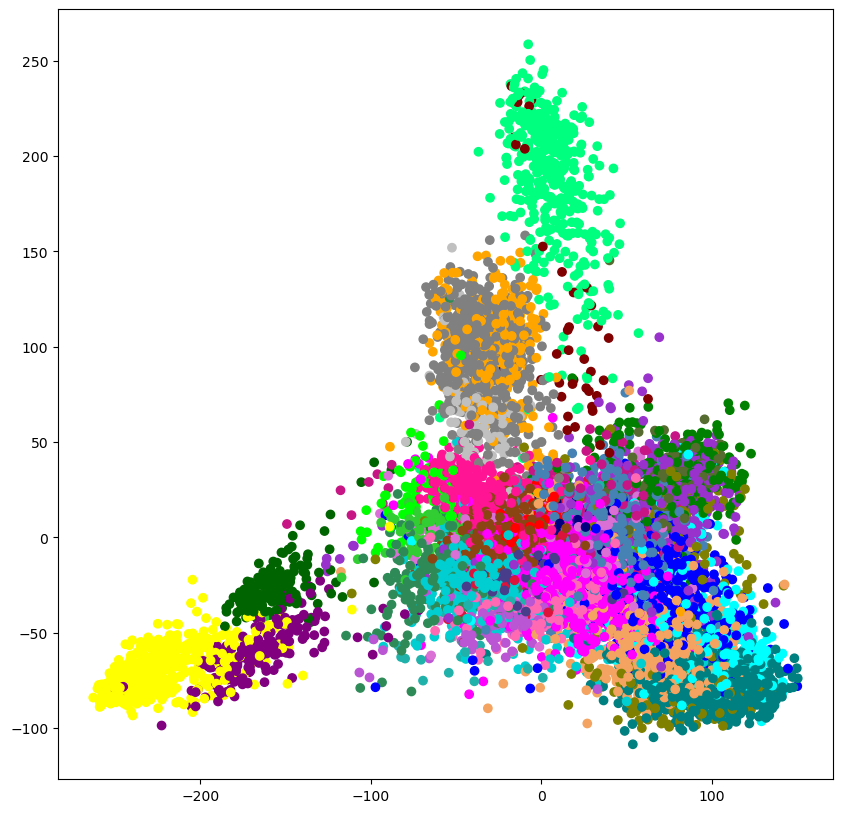

In [39]:
colors = [
    '#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF', 
    '#800000', '#008000', '#000080', '#808000', '#800080', '#008080', 
    '#C0C0C0', '#808080', '#FFA500', '#00FF7F', '#4682B4', '#F4A460', 
    '#DC143C', '#FF69B4', '#C71585', '#006400', '#8B4513', '#556B2F', 
    '#2E8B57', '#00CED1', '#9932CC', '#BA55D3', '#483D8B', '#FF1493', 
    '#20B2AA', '#DA70D6', '#32CD32'
]
scatter_colors = [colors[i] for i in y_encoder]
plt.figure(figsize=(10, 10))
plt.scatter(X_pca[:,0], X_pca[:,1], c=scatter_colors)

In [40]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [45]:
plt.figure(figsize=(10, 10))
for i in range(33):
    index = (y_encoder == i)
    plt.scatter(X_tsne[index][:, 0], X_tsne[index][:, 1], c=scatter_colors[index], label=str(i))
plt.legend()

TypeError: only integer scalar arrays can be converted to a scalar index

<Figure size 1000x1000 with 0 Axes>

numpy.ndarray